<a href="https://colab.research.google.com/github/ChintPatel/CMPE-255-Apache-Beam-Assignment/blob/main/EDA_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

<ipython-input-4-9c02548b62bc>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Postal Code'].fillna(0, inplace=True)
<ipython-input-4-9c02548b62bc>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Ship Mode', data=data, palette="viridis")


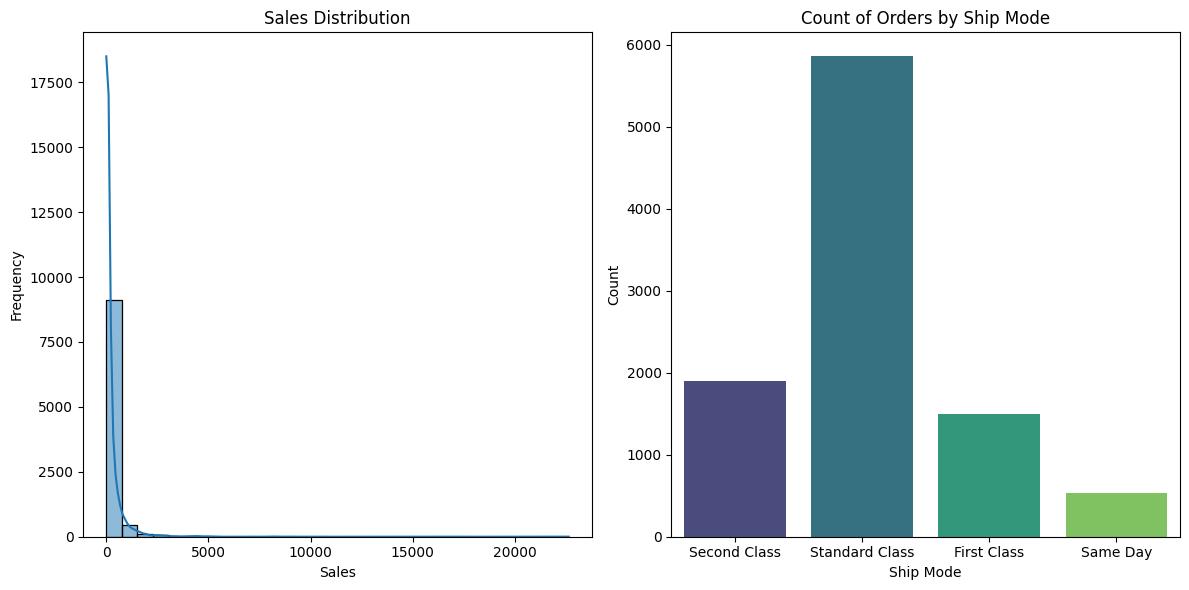

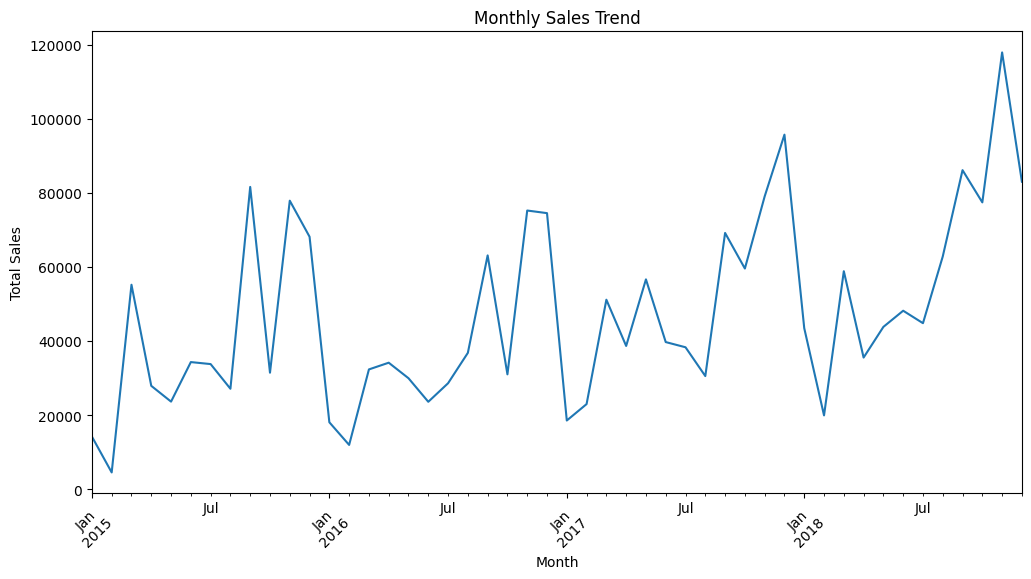

<ipython-input-4-9c02548b62bc>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Sales', data=data, palette="Set2")


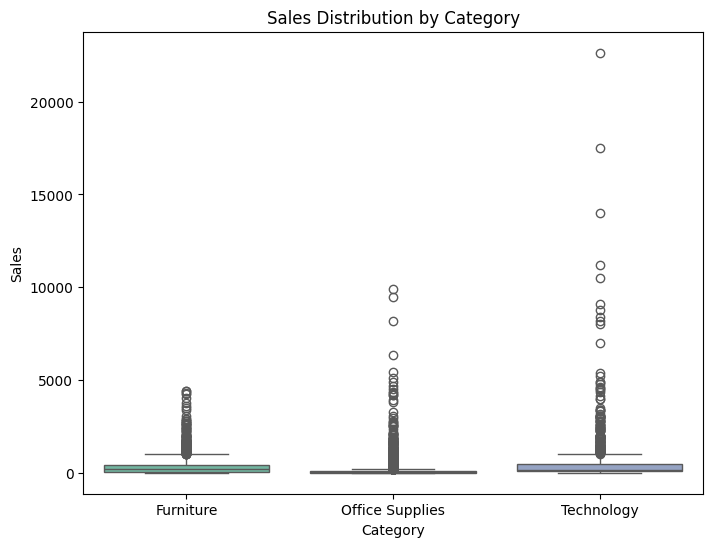

<ipython-input-4-9c02548b62bc>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette="coolwarm")


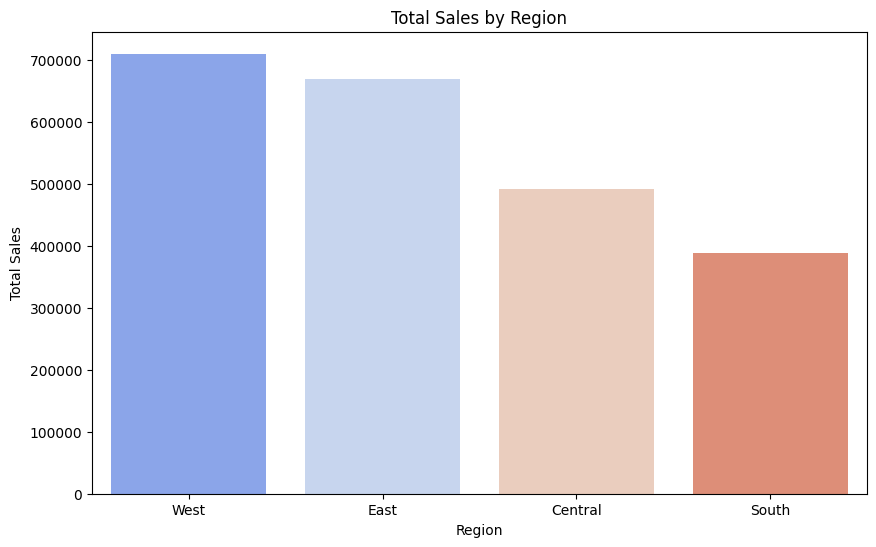

<ipython-input-4-9c02548b62bc>:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Segment', y='Sales', data=data, palette="pastel")


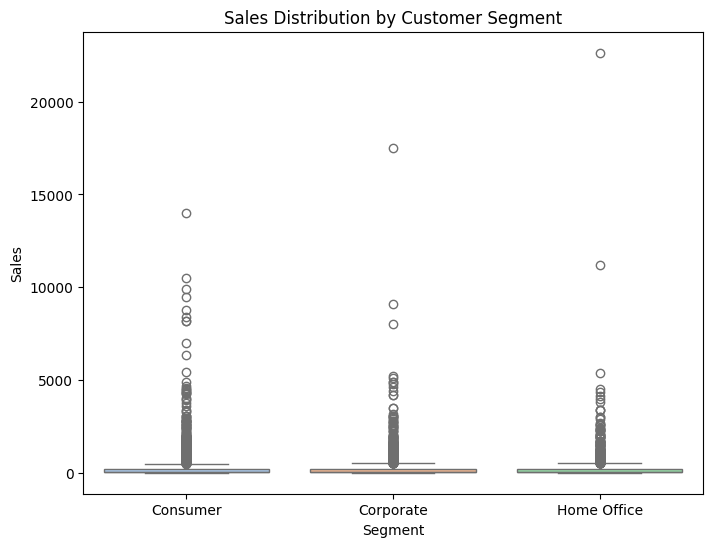

<ipython-input-4-9c02548b62bc>:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_sales.values, y=state_sales.index, palette="magma")


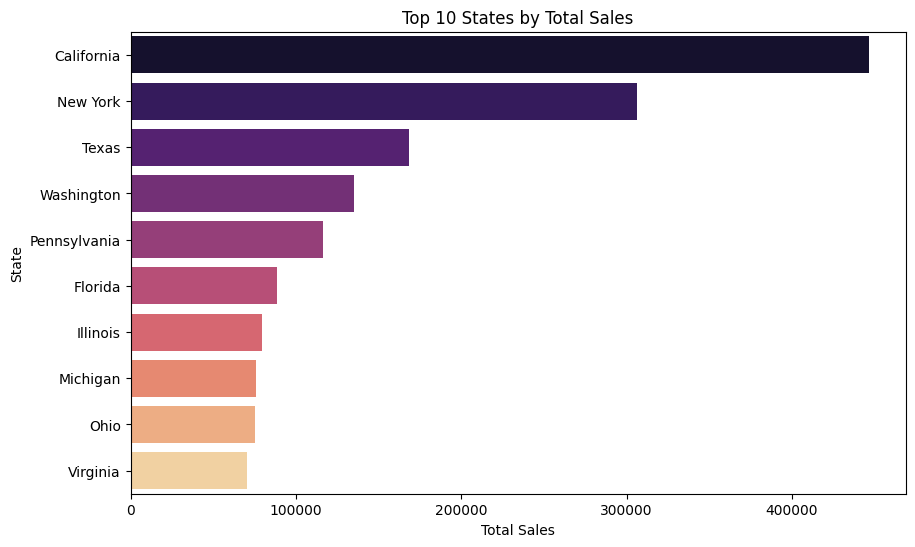

In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
#Dataset Source Kaggle: https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting
file_path = '/content/SuperstoreSalesDataset.csv'  # Update with actual path in your Colab
data = pd.read_csv(file_path)

# Basic Data Overview
data.info()
data.head()

# Handle missing values in Postal Code by filling with a placeholder
data['Postal Code'].fillna(0, inplace=True)

# Descriptive Statistics
data.describe()

# Distribution of Sales
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['Sales'], kde=True, bins=30)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')

# Count of Orders by Ship Mode
plt.subplot(1, 2, 2)
sns.countplot(x='Ship Mode', data=data, palette="viridis")
plt.title('Count of Orders by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Convert Order Date and Ship Date to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d/%m/%Y')
data['Ship Date'] = pd.to_datetime(data['Ship Date'], format='%d/%m/%Y')

# Extract Year and Month for trend analysis
data['Year'] = data['Order Date'].dt.year
data['Month'] = data['Order Date'].dt.to_period('M')

# Monthly Sales Trend
monthly_sales = data.groupby('Month')['Sales'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Sales Distribution by Category
plt.figure(figsize=(8, 6))
sns.boxplot(x='Category', y='Sales', data=data, palette="Set2")
plt.title('Sales Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

# Total Sales by Region
plt.figure(figsize=(10, 6))
region_sales = data.groupby('Region')['Sales'].sum().sort_values(ascending=False)
sns.barplot(x=region_sales.index, y=region_sales.values, palette="coolwarm")
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

# Sales Distribution by Customer Segment
plt.figure(figsize=(8, 6))
sns.boxplot(x='Segment', y='Sales', data=data, palette="pastel")
plt.title('Sales Distribution by Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Sales')
plt.show()

# Top 10 States by Total Sales
state_sales = data.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=state_sales.values, y=state_sales.index, palette="magma")
plt.title('Top 10 States by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('State')
plt.show()


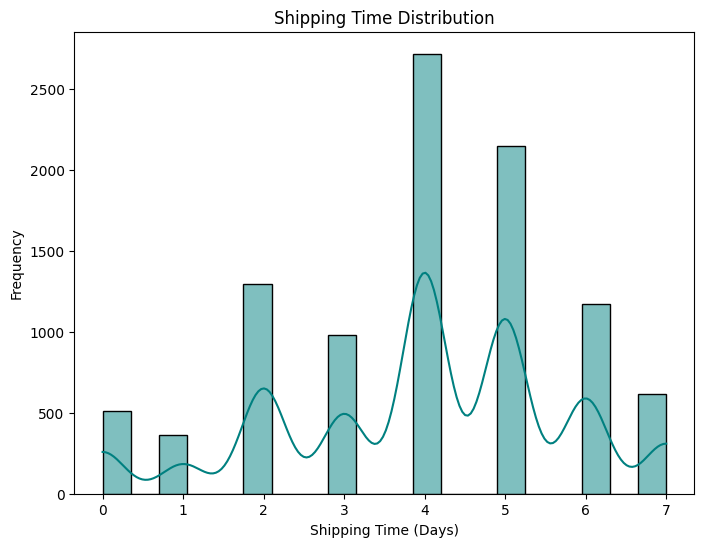

<ipython-input-5-7a4588297e19>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ship Mode', y='Shipping Time (Days)', data=data, palette="cool")


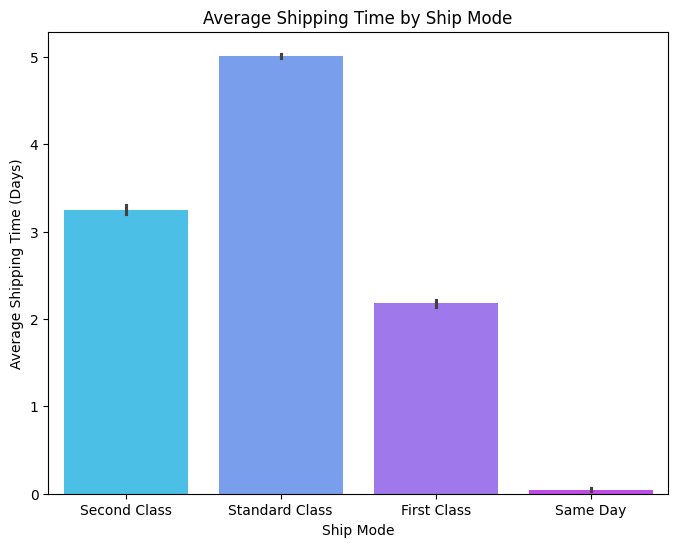

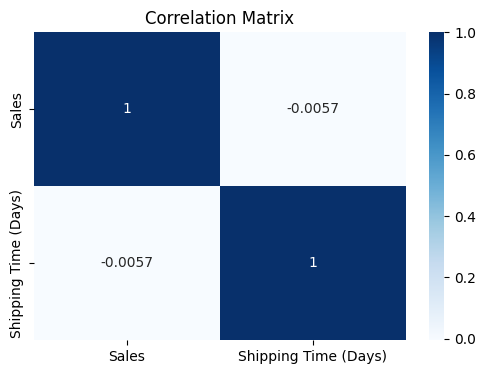

<ipython-input-5-7a4588297e19>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_products_sales.index, x=top_products_sales.values, palette="rocket")


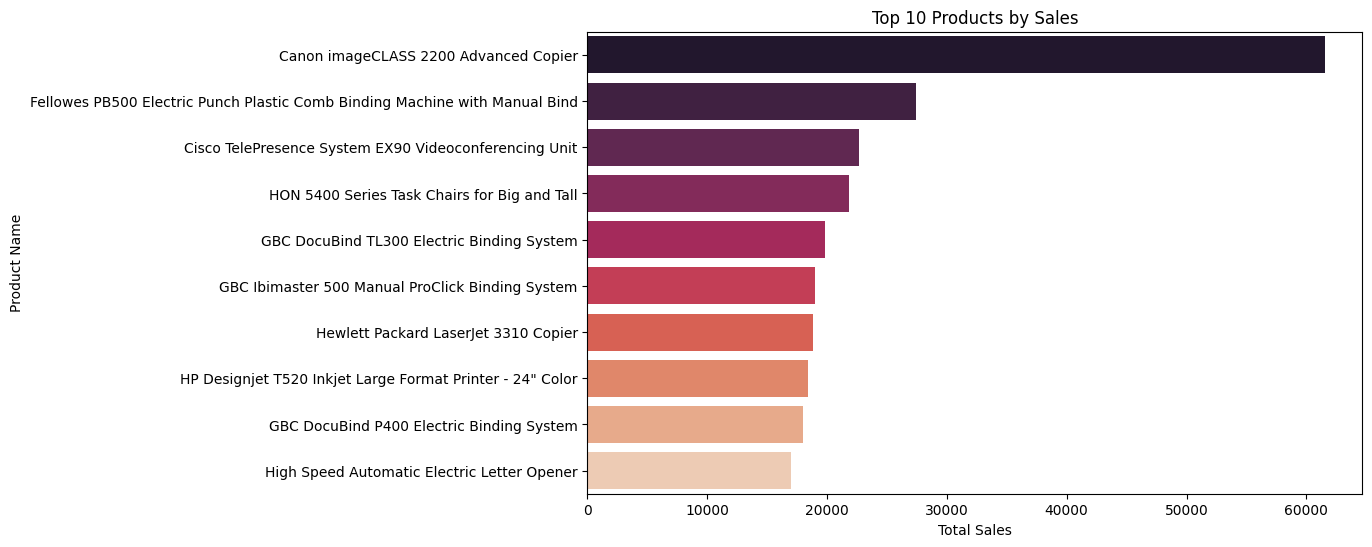

<ipython-input-5-7a4588297e19>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_products_quantity.index, x=top_products_quantity.values, palette="viridis")


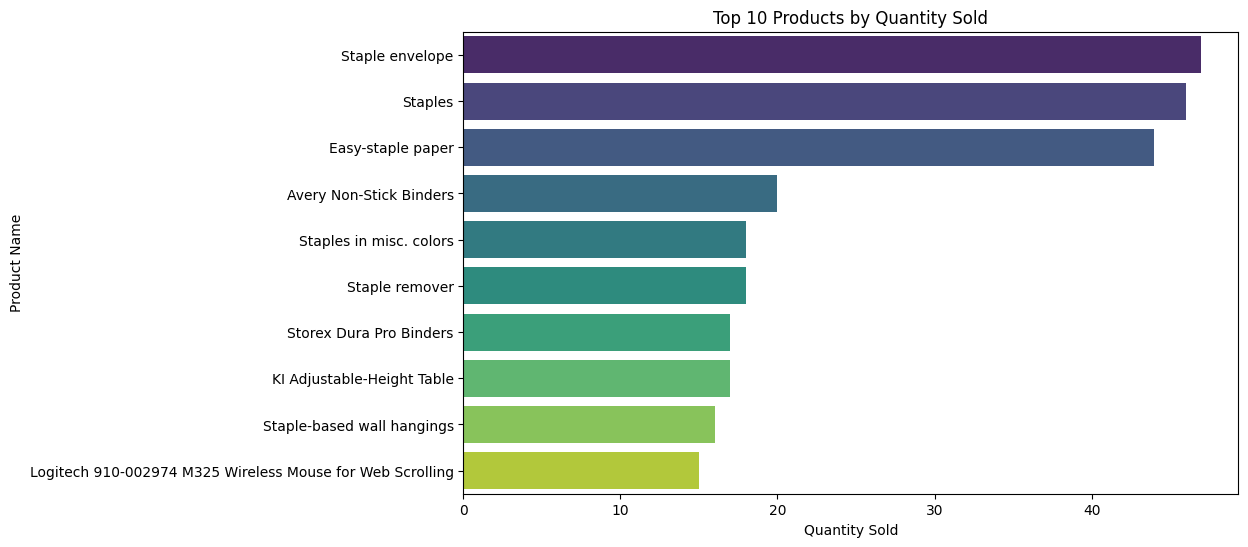

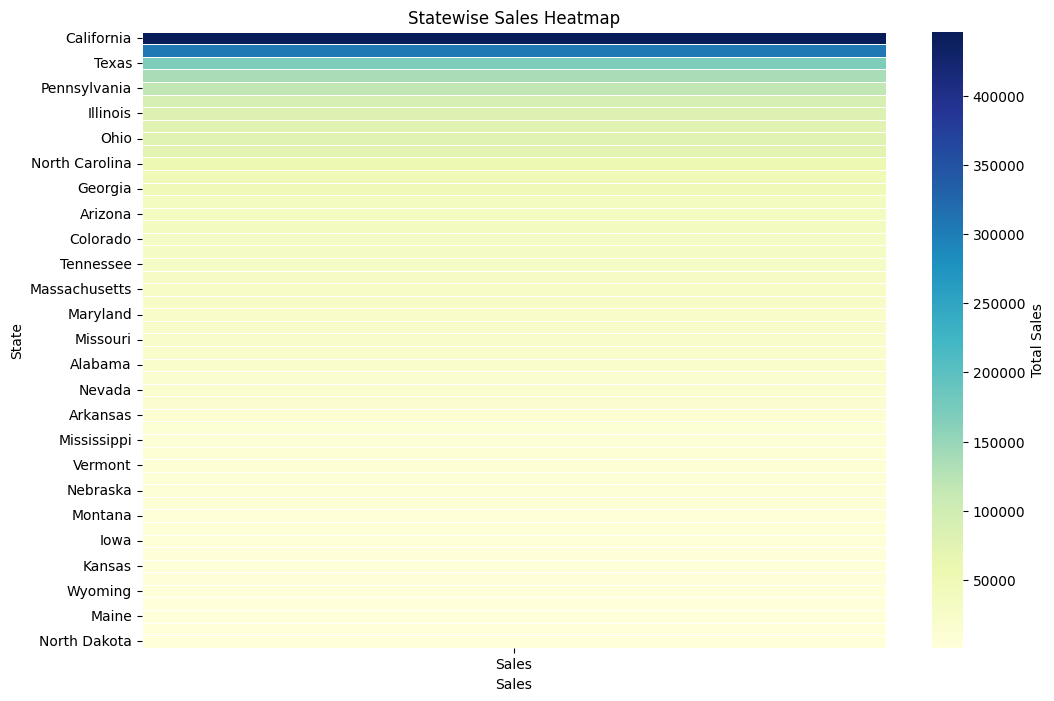

In [5]:
# Import necessary libraries
import numpy as np

# --- 1. Sales and Profit Analysis (if 'Profit' column is available) ---
if 'Profit' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Sales', y='Profit', data=data, hue='Category', palette='coolwarm', alpha=0.7)
    plt.title('Sales vs Profit by Category')
    plt.xlabel('Sales')
    plt.ylabel('Profit')
    plt.legend(title='Category')
    plt.show()

# --- 2. Time to Ship Analysis ---
data['Shipping Time (Days)'] = (data['Ship Date'] - data['Order Date']).dt.days

# Distribution of shipping times
plt.figure(figsize=(8, 6))
sns.histplot(data['Shipping Time (Days)'], kde=True, bins=20, color='teal')
plt.title('Shipping Time Distribution')
plt.xlabel('Shipping Time (Days)')
plt.ylabel('Frequency')
plt.show()

# Average shipping time by Ship Mode
plt.figure(figsize=(8, 6))
sns.barplot(x='Ship Mode', y='Shipping Time (Days)', data=data, palette="cool")
plt.title('Average Shipping Time by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Average Shipping Time (Days)')
plt.show()

# --- 3. Correlation Matrix ---
# Create a correlation matrix for numerical columns
corr_matrix = data[['Sales', 'Shipping Time (Days)']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

# --- 4. Top 10 Products by Sales and Quantity ---
top_products_sales = data.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
top_products_quantity = data['Product Name'].value_counts().head(10)

# Plotting Top 10 Products by Sales
plt.figure(figsize=(10, 6))
sns.barplot(y=top_products_sales.index, x=top_products_sales.values, palette="rocket")
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.show()

# Plotting Top 10 Products by Quantity Sold
plt.figure(figsize=(10, 6))
sns.barplot(y=top_products_quantity.index, x=top_products_quantity.values, palette="viridis")
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.show()

# --- 5. Statewise Sales Heatmap ---
# Create a pivot table to reshape the data appropriately
state_sales_heatmap = data.pivot_table(values='Sales', index='State', aggfunc='sum').sort_values(by='Sales', ascending=False)

# Plotting the sales by state as a horizontal bar chart
plt.figure(figsize=(12, 8))
sns.heatmap(state_sales_heatmap, annot=False, cmap='YlGnBu', linewidths=.5, cbar_kws={'label': 'Total Sales'})
plt.title('Statewise Sales Heatmap')
plt.xlabel('Sales')
plt.ylabel('State')
plt.show()

